In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import cifar10
from keras.datasets import mnist
from matplotlib import pyplot


In [2]:
# 1. 데이터 로드  
(train_images, train_labels) ,( test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 22s 0us/step


In [3]:
#2. 데이터 확인  
print(train_images.shape)

(50000, 32, 32, 3)


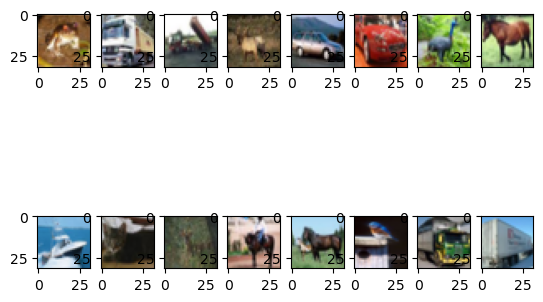

In [4]:
#3. 이미지 16개를 2 * 8로 컬러 사진 출력  
for i  in range(0,16):
    pyplot.subplot(2, 8, i+1 )
    pyplot.imshow( train_images[i] , cmap ='gray')

In [5]:
#4.라벨링 원핫 인코딩    / one - hot 벡터화  
train_labels   = keras.utils.to_categorical(train_labels.astype('int32'), 10 ) 
test_labels    = keras.utils.to_categorical(test_labels.astype('int32'), 10 ) 

In [6]:
test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
#5. 라벨 데이터의 구성확인  
print(train_labels.shape, test_labels.shape)

(50000, 10) (10000, 10)


In [8]:
#6.  학습 라벨 3개 출력
for i in range(0,3):
    print(train_labels[i])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
#7.차원  (60000, 28, 28)  -> (60000, 28, 28, 1) 흑백 , ->  (60000, 28, 28, 3) 컬러 
#train_images = train_images.reshape (train_images.shape[0], 28,28,1)
#test_images = test_images.reshape (test_images.shape[0], 28,28,1)

#8.차원 확인  
#print  (train_images.shape)

#9. 정수형 이미지 데이터를 float 형변환 
train_images= train_images.astype('float32')
test_images= test_images.astype('float32')

#10.학습을 위해서 0~ 255  -> 0 ~ 1.0범위로 지정  255로 나눈다.  
#train_images = train_images / 255.0
#test_images = test_images / 255.0

In [10]:
import numpy as np
#11. 이미지 데이터 차원을 바꾸기    channels_first로 사용 
#train_images = np.transpose(train_images, [0, 3, 1, 2])
#test_images = np.transpose(test_images, [0, 3, 1, 2])
#test_images.shape

In [22]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Activation ,Rescaling , Dropout

#12. CNN모형 만들기   
model_cnn = Sequential([
  Rescaling(1./255, input_shape=(32, 32, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
    
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10)
])

In [23]:
#13 모형 속성 지정  
model_cnn.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),  metrics=['accuracy'])


In [24]:
#14.모형 실행 
hist = model_cnn.fit(train_images, train_labels, batch_size=64, epochs=5, validation_data = (test_images, test_labels),verbose=1 ) 
           

Epoch 1/5
782/782 [==============================] - 11s 12ms/step - loss: 6.6398 - accuracy: 0.0974 - val_loss: 6.4472 - val_accuracy: 0.0986
Epoch 2/5
782/782 [==============================] - 8s 11ms/step - loss: 6.4472 - accuracy: 0.0978 - val_loss: 6.4472 - val_accuracy: 0.0986
Epoch 3/5
782/782 [==============================] - 10s 12ms/step - loss: 6.4472 - accuracy: 0.0978 - val_loss: 6.4472 - val_accuracy: 0.0986
Epoch 4/5
782/782 [==============================] - 8s 10ms/step - loss: 6.4472 - accuracy: 0.0978 - val_loss: 6.4472 - val_accuracy: 0.0986
Epoch 5/5
782/782 [==============================] - 8s 10ms/step - loss: 6.4472 - accuracy: 0.0978 - val_loss: 6.4472 - val_accuracy: 0.0986


In [25]:
#15.결과 확인
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 64)         

313/313 [==============================] - 1s 4ms/step - loss: 6.4472 - accuracy: 0.0986
정답률 = 0.09860000014305115 loss = 6.447240829467773


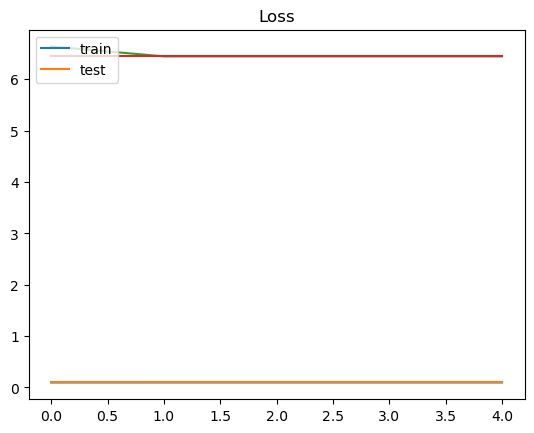

In [26]:
import matplotlib.pyplot as plt
#16.모델 평가  
score   = model_cnn.evaluate(test_images , test_labels, verbose = 1 )
print ('정답률 =', score[1] ,  'loss =' , score[0]) 

#학습모형 , 정답률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc ='upper left')

# 손실 값 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc ='upper left')


In [27]:
#17. 모델 저장 
model_cnn.save('my_model.h5')

In [79]:
from tensorflow.keras.regularizers import l1,l2

model_cnn = Sequential([
  Rescaling(1./255, input_shape=(32, 32, 3)),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),    
  Dropout(0.25),
    
  Conv2D(64, 3, padding='same', activation='relu' ),
  MaxPooling2D(),
  Dropout(0.25),
    
  Conv2D(128, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.25),
  
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.25),
  Dense(10 , activation='softmax')
])

In [ ]:
model_cnn.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),  metrics=['accuracy'])

hist = model_cnn.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data = (test_images, test_labels),verbose=1 ) 
    

Epoch 1/10
782/782 [==============================] - 29s 35ms/step - loss: 1.6368 - accuracy: 0.4015 - val_loss: 1.2811 - val_accuracy: 0.5415
Epoch 2/10
782/782 [==============================] - 24s 31ms/step - loss: 1.2549 - accuracy: 0.5518 - val_loss: 1.0639 - val_accuracy: 0.6268
Epoch 3/10
782/782 [==============================] - 26s 33ms/step - loss: 1.0985 - accuracy: 0.6103 - val_loss: 0.9581 - val_accuracy: 0.6642
Epoch 4/10
782/782 [==============================] - 24s 30ms/step - loss: 1.0044 - accuracy: 0.6459 - val_loss: 0.9143 - val_accuracy: 0.6797
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.9395 - accuracy: 0.6690 - val_loss: 0.8790 - val_accuracy: 0.6888
Epoch 6/10
782/782 [==============================] - 21s 27ms/step - loss: 0.8903 - accuracy: 0.6868 - val_loss: 0.8010 - val_accuracy: 0.7200
Epoch 7/10
782/782 [==============================] - 26s 34ms/step - loss: 0.8432 - accuracy: 0.7028 - val_loss: 0.8317 - val_accuracy:

In [ ]:
score   = model_cnn.evaluate(test_images , test_labels, verbose = 1 )
print ('정답률 =', score[1] ,  'loss =' , score[0]) 

#학습모형 , 정답률
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc ='upper left')

# 손실 값 
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc ='upper left')
plt.show()